<a href="https://colab.research.google.com/github/gracesjy/mldl_study/blob/main/09_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **인피니티북스 "누구나 쉽게 배우는 딥러닝 스타트"(1판) 교재 소스 코드**


## **9장 딥러닝을 깊이 알아보자**
---
* 출판사 : 인피니티북스( https://www.infinitybooks.co.kr )
* 딥러닝 스타트 저자 : 박동규
*  소스코드 저장소 : https://github.com/dongupak/DLstart
*  저작권 : 본 주피터 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저자 표기와 함께 배포해 주십시오.
 * https://www.yes24.com/Product/Goods/124152667
 * 책의 오류는 dongupak@gmail.com 으로 알려주십시오.
---

### 02 딥러닝 모델의 실력을 알아보기
#### 모델의 정확도가 가지는 문제점

In [ ]:
# 입력값 x에 관계없이 0을 반환하는 대충 만든 분류기
def classifier_A(x):
    return 0  # setosa 레이블 0만을 반환함

In [ ]:
import numpy as np
from sklearn.datasets import load_iris

iris_ds = load_iris()  # 붓꽃 데이터셋 가져오기
# 49개의 0(setosa), 1개의 1(versicolor)을 가지는 데이터
biased_iris_ds = iris_ds['data'][1:51]
biased_iris_target = iris_ds['target'][1:51]

print(biased_iris_ds[:5])

[[4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]]


In [ ]:
# 49개의 0(setosa), 1개의 1(versicolor)을 가지는 데이터
print(biased_iris_target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [ ]:
result = []
for x in biased_iris_ds:
    result.append(classifier_A(x))

print('분류 결과:')
print(np.array(result))

분류 결과:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score

print('classifier_A(x)의 분류 성능 :')
accuracy_score(biased_iris_target, result)

classifier_A(x)의 분류 성능 :


0.98

#### 데이터의 편향과 데이터 증강

In [ ]:
import numpy as np
from sklearn.datasets import load_iris

iris_ds = load_iris()  # 붓꽃 데이터셋 가져오기
# 50개의 0(setosa), 50개의 1(versicolor)을 가지는 데이터
balanced_iris_ds = iris_ds['data'][:100]
balanced_iris_target = iris_ds['target'][:100]

result = []
for x in balanced_iris_ds:
    result.append(classifier_A(x))

print('엉터리 분리기의 분류 결과:')
print(np.array(result))

엉터리 분리기의 분류 결과:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score

print('엉터리 분류기 classifier_A(x)의 분류 성능 :')
accuracy_score(balanced_iris_target, result)

엉터리 분류기 classifier_A(x)의 분류 성능 :


0.5

---
#### 사이킷런의 성능지표 함수들

In [ ]:
target = np.array([0] * 10 + [1] * 10)
target  # 10개의 0(Negative), 10개의 1(Positive)를 가짐

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
pred = np.array([0,0,0,0,0,1,1,1,0,0,1,1,1,1,1,1,0,0,1,1])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, pred)   # 혼동행렬 만들기

array([[7, 3],
       [2, 8]])

In [ ]:
from sklearn.metrics import precision_score, recall_score

print('정밀도 :', precision_score(target, pred))
print('재현율 :', recall_score(target, pred))

from sklearn.metrics import accuracy_score, f1_score

print('정확도 :', accuracy_score(target, pred))
print('F1점수 :', f1_score(target, pred))

정밀도 : 0.7272727272727273
재현율 : 0.8
정확도 : 0.75
F1점수 : 0.761904761904762


---
### 03 다양한 스케일러를 알아보자

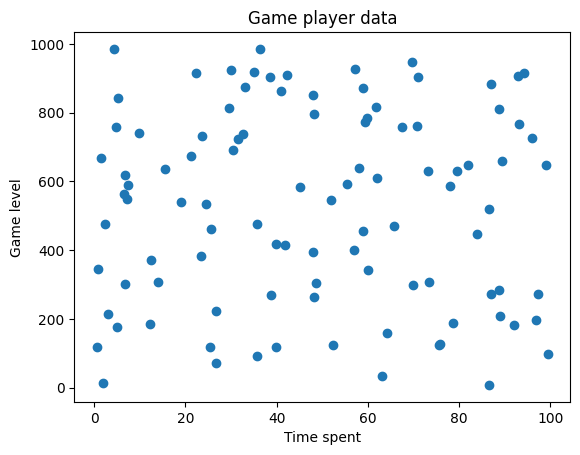

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 0에서 1000 범위의 난수 생성
game_level = np.random.rand(100) * 1000
# 0에서 100 범위의 난수 생성
game_time = np.random.rand(100) * 100

# 게임사 A의 게임 이용자 분석: 산포도 그래프
plt.title("Game player data")
plt.xlabel('Time spent')
plt.ylabel('Game level')
plt.scatter(game_time, game_level)

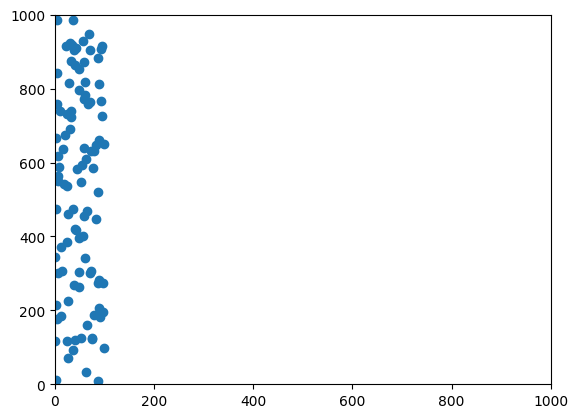

In [ ]:
# 동일한 축적으로 데이터를 시각화하자
plt.xlim(0, 1000); plt.ylim(0, 1000)
plt.scatter(game_time, game_level)

In [ ]:
# game_time, game_level 리스트를 하나로 묶어서 2d 배열을 생성
gamer_data = np.array(list(zip(game_time, game_level)))
print(gamer_data[:5])

[[ 35.64645943 475.22305186]
 [ 73.30217626 307.67412338]
 [ 24.5713591  535.21891496]
 [ 51.8985015  546.29885696]
 [ 31.63144018 724.19421389]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()    # min-max 스케일러 객체 생성
scaler.fit(gamer_data)     # gamer_data를 피팅
n_data = scaler.transform(gamer_data)  # gamer_data를 0에서 1 사이 값으로
n_data[:, 0].mean(), n_data[:, 1].mean()

(0.48181705233359196, 0.5311067100702669)

In [ ]:
n_data[:, 0].min(), n_data[:, 0].max() # 첫 번째 열의 최소값, 최대값최대값

(0.0, 1.0)

In [ ]:
n_data[:, 1].min(), n_data[:, 1].max() # 두 번째 열의 최소값, 최대값

(0.0, 1.0000000000000002)

In [ ]:
import numpy as np

a = np.array([10, 8, 10, 8, 8, 4])
print('합계 :', a.sum())
print('평균 :', a.mean())
print('분산 :', a.var())
print('표준편차 :', a.std())

합계 : 48
평균 : 8.0
분산 : 4.0
표준편차 : 2.0


In [ ]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(gamer_data)
gamer_data_scaled = standardScaler.transform(gamer_data)

gamer_data_scaled[:, 0].std(), gamer_data_scaled[:, 1].std()

NameError: name 'gamer_data' is not defined

In [ ]:
gamer_data_scaled[:, 0].mean(), gamer_data_scaled[:, 1].mean()

(-1.3100631690576846e-16, -1.1390888232654106e-15)

---
### 04 학습 데이터에만 최적화된 신경망 개선하기 : 드롭아웃
#### 드롭아웃으로 과대적합을 예방

In [ ]:
import numpy as np
import tensorflow as tf

data = np.arange(1, 11).reshape(2, 5).astype(np.float32)
print(data)

[[ 1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10.]]


In [ ]:
layer = tf.keras.layers.Dropout(.3, input_shape = (2, ))
outputs = layer(data, training=True)
print(outputs)

tf.Tensor(
[[ 0.         2.857143   0.         0.         7.1428576]
 [ 0.         0.         0.         0.        14.285715 ]], shape=(2, 5), dtype=float32)


In [ ]:
# 1에서 10까지의 연속된 수를 만들고 이를 (2, 5) 형태로 고치기
data = np.arange(1, 11).reshape(2, 5).astype(np.float32)
print(data)
print('data의 합 :', np.sum(data))

[[ 1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10.]]
data의 합 : 55.0


In [ ]:
# 입력 데이터의 30%를 드롭아웃 시키고 결과를 출력하자.
layer = tf.keras.layers.Dropout(.3, input_shape = (2, ))
outputs = layer(data, training=True)
print(outputs)
print('출력의 합 :', np.sum(outputs))

tf.Tensor(
[[ 1.4285715  2.857143   0.         5.714286   0.       ]
 [ 8.571428  10.        11.428572  12.857143  14.285715 ]], shape=(2, 5), dtype=float32)
출력의 합 : 67.14286


In [ ]:
# 입력 데이터의 50%를 드롭아웃 시키고 결과를 출력하자.
layer = tf.keras.layers.Dropout(.5, input_shape = (2, ))
outputs = layer(data, training=True)
print(outputs)
print('출력의 합 :', np.sum(outputs))

tf.Tensor(
[[ 0.  4.  0.  0. 10.]
 [ 0. 14.  0. 18.  0.]], shape=(2, 5), dtype=float32)
출력의 합 : 46.0


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

#드롭아웃 계층을 가진 신경망 모델 만들기
model = keras.models.Sequential([
       keras.layers.Flatten(input_shape = (28, 28)),
       keras.layers.Dropout(0.2),
       keras.layers.Dense(64, activation = 'relu'),
       keras.layers.Dropout(0.2),
       keras.layers.Dense(64, activation = 'relu'),
       keras.layers.Dropout(0.2),
       keras.layers.Dense(10, activation = 'softmax')
])

---
### 05 패션 MNIST 데이터
#### 패션 MNIST 이미지 데이터 분류

In [ ]:
# tensorflow와 tf.keras를 임포트한다
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 패션 MNIST 데이터는 keras에서 제공함. 이를 학습용, 테스트 데이터로 구분.
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = \
    fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(train_images.shape)  # 학습 이미지의 형태와 레이블을 출력한다
print(train_labels)
print(test_images.shape)

(60000, 28, 28)
[9 0 0 ... 3 0 5]
(10000, 28, 28)


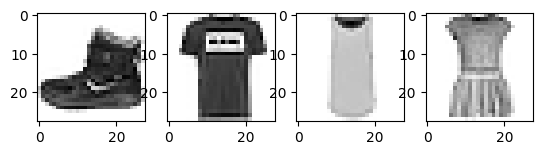

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 4, 1)
ax2 = fig.add_subplot(1, 4, 2)
ax3 = fig.add_subplot(1, 4, 3)
ax4 = fig.add_subplot(1, 4, 4)

ax1.imshow(train_images[0], cmap='Greys') # 첫 번째 훈련용 데이터
ax2.imshow(train_images[1], cmap='Greys') # 두 번째 훈련용 데이터
ax3.imshow(train_images[2], cmap='Greys') # 세 번째 훈련용 데이터
ax4.imshow(train_images[3], cmap='Greys') # 네 번째 훈련용 데이터

In [ ]:
print(train_labels[:4])

[9 0 0 3]


In [ ]:
mnist_lbl = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',\
            'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle_boot']

labels = train_labels[:4]
for i in labels:
    print('{} : {}'.format(i, mnist_lbl[i]))

9 : Ankle_boot
0 : T-shirt
0 : T-shirt
3 : Dress


Text(0, 0, 'Dress')

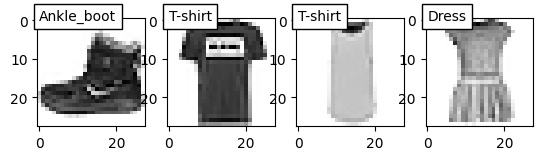

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 4, 1)
ax2 = fig.add_subplot(1, 4, 2)
ax3 = fig.add_subplot(1, 4, 3)
ax4 = fig.add_subplot(1, 4, 4)

ax1.imshow(train_images[0], cmap='Greys') # 첫 번째 훈련용 데이터
ax2.imshow(train_images[1], cmap='Greys') # 두 번째 훈련용 데이터
ax3.imshow(train_images[2], cmap='Greys') # 세 번째 훈련용 데이터
ax4.imshow(train_images[3], cmap='Greys') # 네 번째 훈련용 데이터

ax1.text(0, 0, mnist_lbl[train_labels[0]], bbox={'facecolor': 'white'})
ax2.text(0, 0, mnist_lbl[train_labels[1]], bbox={'facecolor': 'white'})
ax3.text(0, 0, mnist_lbl[train_labels[2]], bbox={'facecolor': 'white'})
ax4.text(0, 0, mnist_lbl[train_labels[3]], bbox={'facecolor': 'white'})

---

##### 단계 8

In [ ]:
# 0-255 구간의 픽셀값을 실수로 정규화한다
train_images, test_images = train_images / 255, test_images / 255

model = keras.models.Sequential( [
   keras.layers.Flatten(input_shape=(28, 28)),
   keras.layers.Dropout(0.2),  # 20%의 드롭아웃 설정
   keras.layers.Dense(128, activation= 'relu'),
   keras.layers.Dense(32, activation= 'relu'),
   keras.layers.Dense(10, activation= 'softmax'),
])

##### 단계 9

In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
history = model.fit(train_images, train_labels, batch_size=64,
                    epochs=10, validation_split=0.25)

Epoch 1/10
704/704 [==============================] - 4s 4ms/step - loss: 0.5852 - accuracy: 0.7949 - val_loss: 0.4259 - val_accuracy: 0.8471
Epoch 2/10
704/704 [==============================] - 3s 4ms/step - loss: 0.4385 - accuracy: 0.8427 - val_loss: 0.4132 - val_accuracy: 0.8506
Epoch 3/10
704/704 [==============================] - 3s 4ms/step - loss: 0.3986 - accuracy: 0.8536 - val_loss: 0.3783 - val_accuracy: 0.8620
Epoch 4/10
704/704 [==============================] - 3s 4ms/step - loss: 0.3756 - accuracy: 0.8618 - val_loss: 0.3517 - val_accuracy: 0.8717
Epoch 5/10
704/704 [==============================] - 2s 3ms/step - loss: 0.3550 - accuracy: 0.8686 - val_loss: 0.3491 - val_accuracy: 0.8751
Epoch 6/10
704/704 [==============================] - 2s 3ms/step - loss: 0.3424 - accuracy: 0.8723 - val_loss: 0.3434 - val_accuracy: 0.8737
Epoch 7/10
704/704 [==============================] - 2s 3ms/step - loss: 0.3294 - accuracy: 0.8771 - val_loss: 0.3394 - val_accuracy: 0.8728
Epoch 

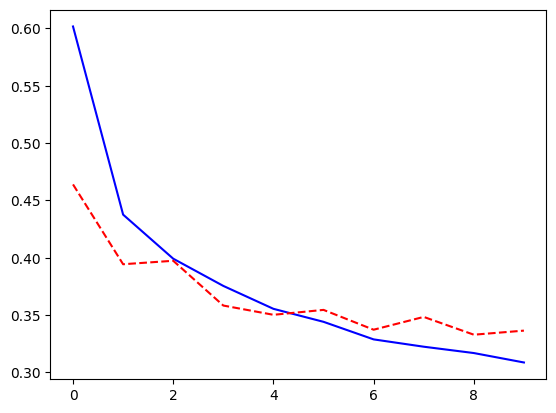

In [ ]:
plt.plot(history.history['loss'], 'b-')
plt.plot(history.history['val_loss'], 'r--')

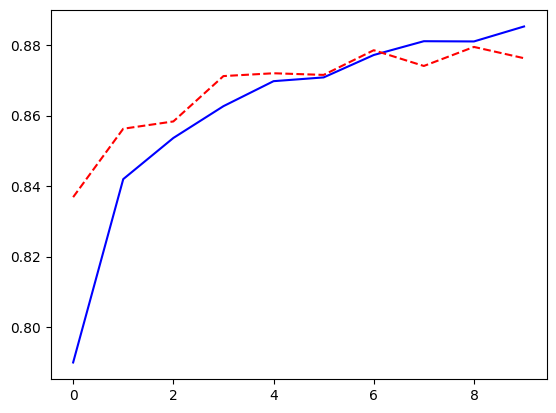

In [ ]:
plt.plot(history.history['accuracy'], 'b-')
plt.plot(history.history['val_accuracy'], 'r--')

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, \
                                     verbose=2)
print('테스트 정확도:', test_acc)

313/313 - 1s - loss: 0.3626 - accuracy: 0.8679 - 950ms/epoch - 3ms/step
테스트 정확도: 0.867900013923645


random 인덱스 : 102


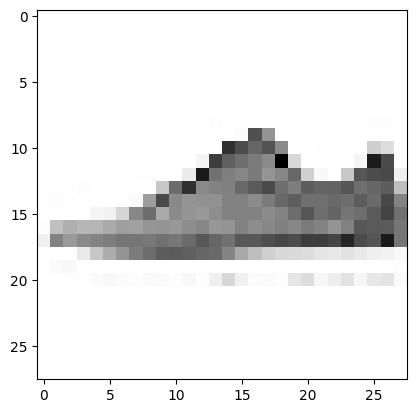

In [ ]:
np.random.seed(42)  # 시드값이 일정하면 항상 같은 난수가 생성됨
randIdx = np.random.randint(0, 1000)
print('random 인덱스 :', randIdx)
plt.imshow(test_images[randIdx], cmap='Greys')

In [ ]:
print('테스트용 이미지의 형태:', test_images[randIdx].shape)
new_image = test_images[randIdx][np.newaxis, :, :]
print('테스트용 이미지를 모델에 입력하기 위한 형태:', test_images[randIdx].shape)
print(new_image.shape)

yhat = model.predict(new_image)
print(yhat.round(3))    # 소수점 아래 세 자리 정확도로 살펴보자

테스트용 이미지의 형태: (28, 28)
테스트용 이미지를 모델에 입력하기 위한 형태: (28, 28)
(1, 28, 28)
1/1 [==============================] - 0s 27ms/step
[[0.    0.    0.    0.    0.    0.003 0.    0.995 0.    0.002]]


In [ ]:
yhat = np.argmax( model.predict(\
                                test_images[randIdx][np.newaxis, :, :]) )
print('이미지에 대한 모델의 출력:', yhat)

1/1 [==============================] - 0s 23ms/step
이미지에 대한 모델의 출력: 7


In [ ]:
print('이미지에 대한 모델의 출력:', mnist_lbl[yhat])

이미지에 대한 모델의 출력: Sneaker


In [ ]:
def plot_4images(images, labels):
  fig = plt.figure()
  ax1 = fig.add_subplot(1, 4, 1)
  ax2 = fig.add_subplot(1, 4, 2)
  ax3 = fig.add_subplot(1, 4, 3)
  ax4 = fig.add_subplot(1, 4, 4)

  ax1.imshow(images[0], cmap='Greys') # 첫 번째 훈련용 데이터
  ax2.imshow(images[1], cmap='Greys') # 두 번째 훈련용 데이터
  ax3.imshow(images[2], cmap='Greys') # 세 번째 훈련용 데이터
  ax4.imshow(images[3], cmap='Greys') # 네 번째 훈련용 데이터

  ax1.text(0, 0, mnist_lbl[labels[0]], bbox={'facecolor': 'white'})
  ax2.text(0, 0, mnist_lbl[labels[1]], bbox={'facecolor': 'white'})
  ax3.text(0, 0, mnist_lbl[labels[2]], bbox={'facecolor': 'white'})
  ax4.text(0, 0, mnist_lbl[labels[3]], bbox={'facecolor': 'white'})

1/1 [==============================] - 0s 118ms/step
[9 2 1 1]


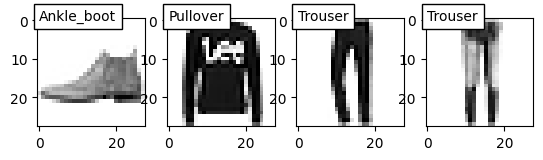

In [ ]:
images = test_images[:4]
predictions = np.argmax(model.predict(images), axis=1)
print(predictions)
plot_4images(images, predictions)